Saving Cat.jpg to Cat.jpg


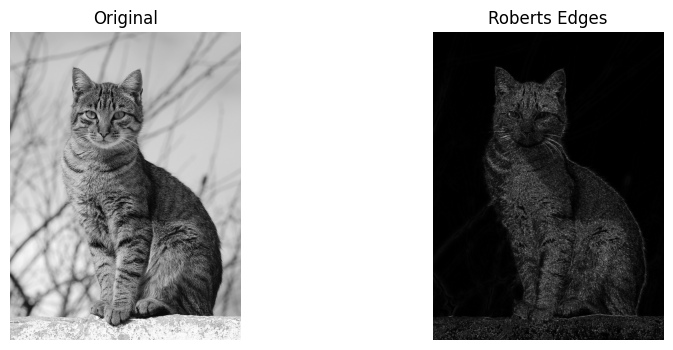

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load image (upload or synthetic fallback)
try:
    from google.colab import files
    from PIL import Image
    import io
    uploaded = files.upload()
    fname = next(iter(uploaded))
    img = Image.open(io.BytesIO(uploaded[fname])).convert('L')
except:
    print("No upload detected. Using synthetic gradient image.")
    import numpy as np
    xx, yy = np.meshgrid(np.linspace(0,255,256), np.linspace(0,255,256))
    img = np.uint8(xx * 0.5 + yy * 0.5)

img = np.asarray(img, dtype=np.float32)

# Roberts kernels (2x2)
Gx = np.array([[1, 0],
               [0, -1]], dtype=np.float32)

Gy = np.array([[0, 1],
               [-1, 0]], dtype=np.float32)

# Convolve manually
def convolve_2x2(img, kernel):
    H, W = img.shape
    out = np.zeros((H-1, W-1), dtype=np.float32)
    for i in range(H-1):
        for j in range(W-1):
            out[i,j] = np.sum(img[i:i+2, j:j+2] * kernel)
    return out

gx = convolve_2x2(img, Gx)
gy = convolve_2x2(img, Gy)
edges = np.sqrt(gx**2 + gy**2)
edges = (edges / edges.max()) * 255  # scale to 0-255

# Display
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Roberts Edges"); plt.axis('off')
plt.show()


Saving Cat.jpg to Cat (1).jpg


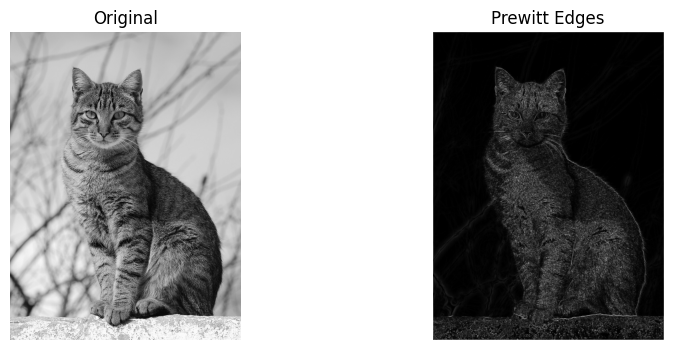

In [2]:
# ✅ Prewitt Edge Detection

import numpy as np
import matplotlib.pyplot as plt

try:
    from google.colab import files
    from PIL import Image
    import io
    uploaded = files.upload()
    fname = next(iter(uploaded))
    img = Image.open(io.BytesIO(uploaded[fname])).convert('L')
except:
    print("No upload detected. Using synthetic gradient.")
    xx, yy = np.meshgrid(np.linspace(0,255,256), np.linspace(0,255,256))
    img = np.uint8(xx * 0.5 + yy * 0.5)

img = np.asarray(img, dtype=np.float32)

# Prewitt kernels (3x3)
Gx = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]], dtype=np.float32)

Gy = np.array([[-1,-1,-1],
               [ 0, 0, 0],
               [ 1, 1, 1]], dtype=np.float32)

def convolve(img, kernel):
    H, W = img.shape
    k = kernel.shape[0]
    pad = k//2
    padded = np.pad(img, pad)
    out = np.zeros_like(img)
    for i in range(H):
        for j in range(W):
            out[i,j] = np.sum(padded[i:i+k, j:j+k] * kernel)
    return out

gx = convolve(img, Gx)
gy = convolve(img, Gy)
edges = np.sqrt(gx**2 + gy**2)
edges = (edges / edges.max()) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Prewitt Edges"); plt.axis('off')
plt.show()


Saving Cat.jpg to Cat (2).jpg


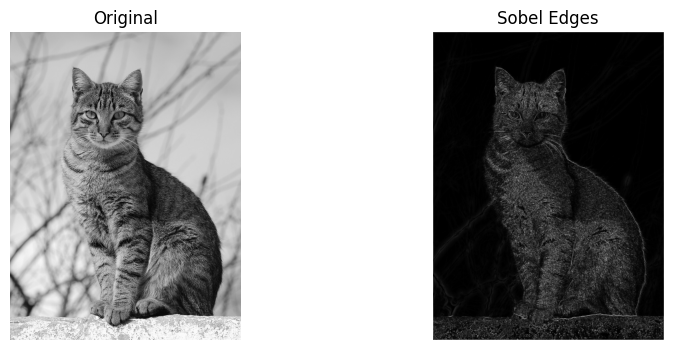

In [3]:
# ✅ Sobel Edge Detection

import numpy as np
import matplotlib.pyplot as plt

try:
    from google.colab import files
    from PIL import Image
    import io
    uploaded = files.upload()
    fname = next(iter(uploaded))
    img = Image.open(io.BytesIO(uploaded[fname])).convert('L')
except:
    print("No upload detected. Using synthetic gradient.")
    xx, yy = np.meshgrid(np.linspace(0,255,256), np.linspace(0,255,256))
    img = np.uint8(xx * 0.5 + yy * 0.5)

img = np.asarray(img, dtype=np.float32)

# Sobel kernels (3x3)
Gx = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1]], dtype=np.float32)

Gy = np.array([[-1,-2,-1],
               [ 0, 0, 0],
               [ 1, 2, 1]], dtype=np.float32)

def convolve(img, kernel):
    H, W = img.shape
    k = kernel.shape[0]
    pad = k//2
    padded = np.pad(img, pad)
    out = np.zeros_like(img)
    for i in range(H):
        for j in range(W):
            out[i,j] = np.sum(padded[i:i+k, j:j+k] * kernel)
    return out

gx = convolve(img, Gx)
gy = convolve(img, Gy)
edges = np.sqrt(gx**2 + gy**2)
edges = (edges / edges.max()) * 255

plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(edges, cmap='gray'); plt.title("Sobel Edges"); plt.axis('off')
plt.show()
